In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
df_teams = pd.read_csv("mlb_teams.csv", encoding='utf-16')
df_games = pd.read_csv("mlb_games.csv", encoding='utf-16')

In [ ]:
# Sadece Normal Sezon maçlarını alalım
df_games_reg = df_games[df_games['season'] == 'Regular Season'].copy()

# Sütun isimlerindeki olası boşlukları temizleyelim (Garanti olsun)
df_games_reg.columns = df_games_reg.columns.str.strip()

In [ ]:
# Takım kodunu (prefix_1) anahtar, Tam İsmi (team) değer olarak alan bir sözlük yapalım
# Örnek: {'chw': 'Chicago White Sox', 'nyy': 'New York Yankees', ...}
team_map = pd.Series(df_teams.team.values, index=df_teams.prefix_1).to_dict()

# Şimdi maç tablosundaki kodları bu isimlerle değiştirelim
df_games_reg['home_team_name'] = df_games_reg['home_team'].map(team_map)
df_games_reg['away_team_name'] = df_games_reg['away_team'].map(team_map)

# İsim eşleşmesi olmayan (hatalı) satır varsa uçuralım
df_games_reg.dropna(subset=['home_team_name', 'away_team_name'], inplace=True)

In [ ]:
import networkx as nx

# Boş bir grafik (Graph) oluştur
G = nx.Graph()

# Maç listesindeki her satırı tek tek gez
for index, row in df_games_reg.iterrows():
    ev_sahibi = row['home_team_name']
    deplasman = row['away_team_name']

    # Bu iki takım arasında daha önce bir bağ var mı?
    if G.has_edge(ev_sahibi, deplasman):
        # Varsa, oynadıkları maç sayısını (weight) 1 artır
        G[ev_sahibi][deplasman]['weight'] += 1
    else:
        # Yoksa, aralarına yeni bir bağ kur ve maç sayısını 1 yap
        G.add_edge(ev_sahibi, deplasman, weight=1)

print(f"Graph oluşturuldu! Toplam Düğüm (Takım) Sayısı: {G.number_of_nodes()}")
print(f"Toplam Kenar (Eşleşme) Sayısı: {G.number_of_edges()}")

Graph oluşturuldu! Toplam Düğüm (Takım) Sayısı: 30
Toplam Kenar (Eşleşme) Sayısı: 435


In [ ]:
# Metrikleri hesapla
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G, weight='weight')
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

# Sonuçları güzel bir tabloya dök
metrics_df = pd.DataFrame({
    'Degree': degree,
    'Betweenness': betweenness,
    'Closeness': closeness,
    'Eigenvector': eigenvector
})

# İlk 5 takımı göster
print(metrics_df.sort_values(by='Degree', ascending=False).head())

                   Degree  Betweenness  Closeness  Eigenvector
Chicago White Sox     1.0     0.038177        1.0     0.182574
Cleveland Indians     1.0     0.018062        1.0     0.182574
Minnesota Twins       1.0     0.006158        1.0     0.182574
Toronto Blue Jays     1.0     0.011084        1.0     0.182574
Tampa Bay Rays        1.0     0.027915        1.0     0.182574


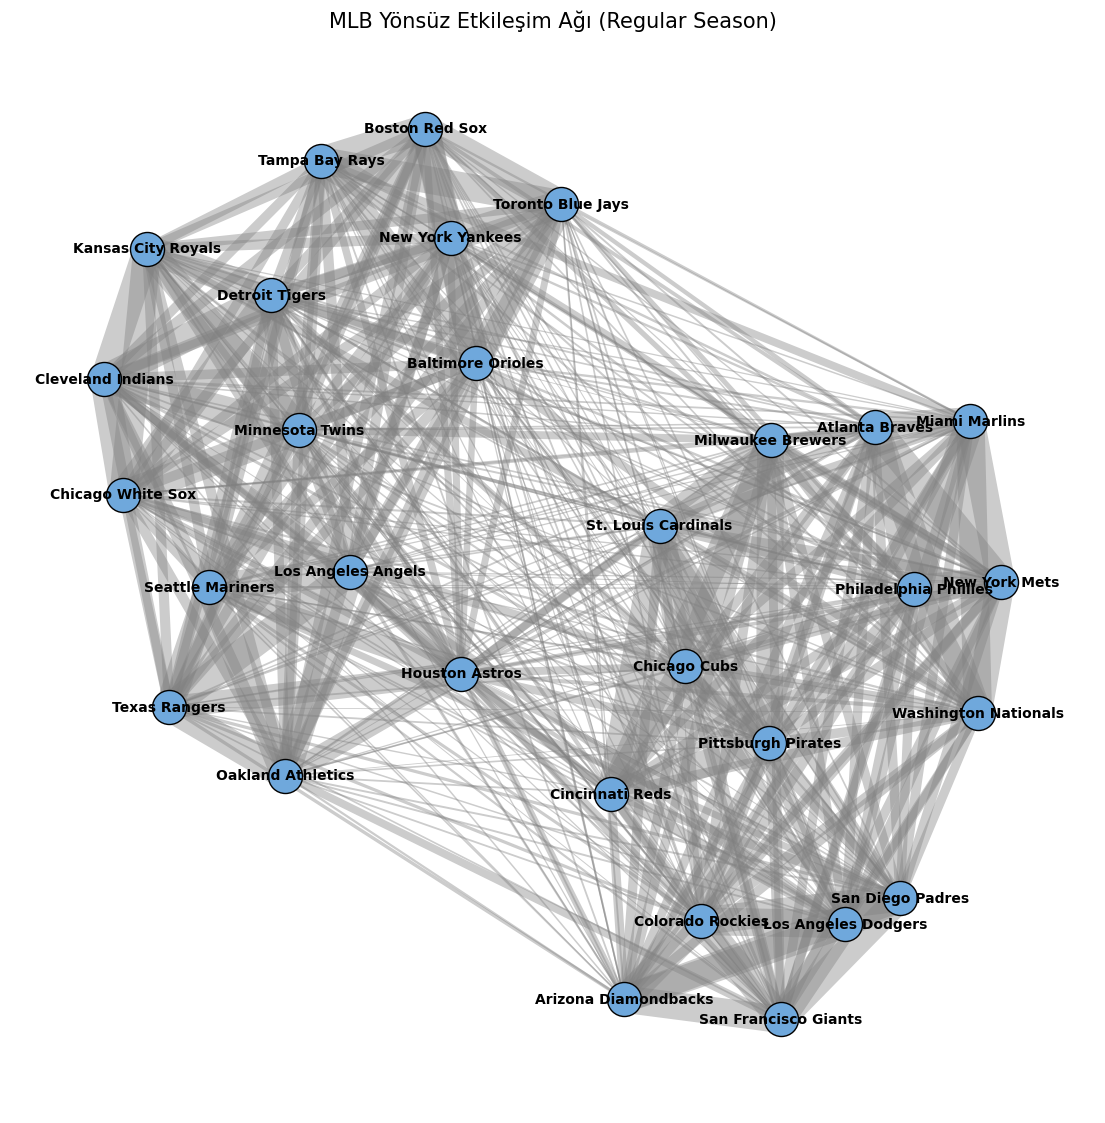

In [ ]:
#Düğüm ve kenar dosyalarını oluşturma
